In [1]:
import meds
import numpy as np
import proplot as plot

from ngmix.medsreaders import MultiBandNGMixMEDS, NGMixMEDS

In [2]:
m = NGMixMEDS("DES2132-5748_r5227p01_i_pizza-cutter-slices.fits.fz")

mbmeds = MultiBandNGMixMEDS([m])

In [3]:
from pizza_cutter_metadetect.gaia_stars import load_gaia_stars, mask_gaia_stars, BMASK_GAIA_STAR

gaia_stars = load_gaia_stars(
    mbmeds,
    [1.36055007e-03, -1.55098040e-01,  3.46641671e+00],
    18,
)

In [14]:
import fitsio

data = fitsio.read("DES2132-5748_metadetect-v2_mdetcat_range0012-0012.fits")

In [29]:
data['mfrac']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00041344, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00042202, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03337244], dtype=float32)

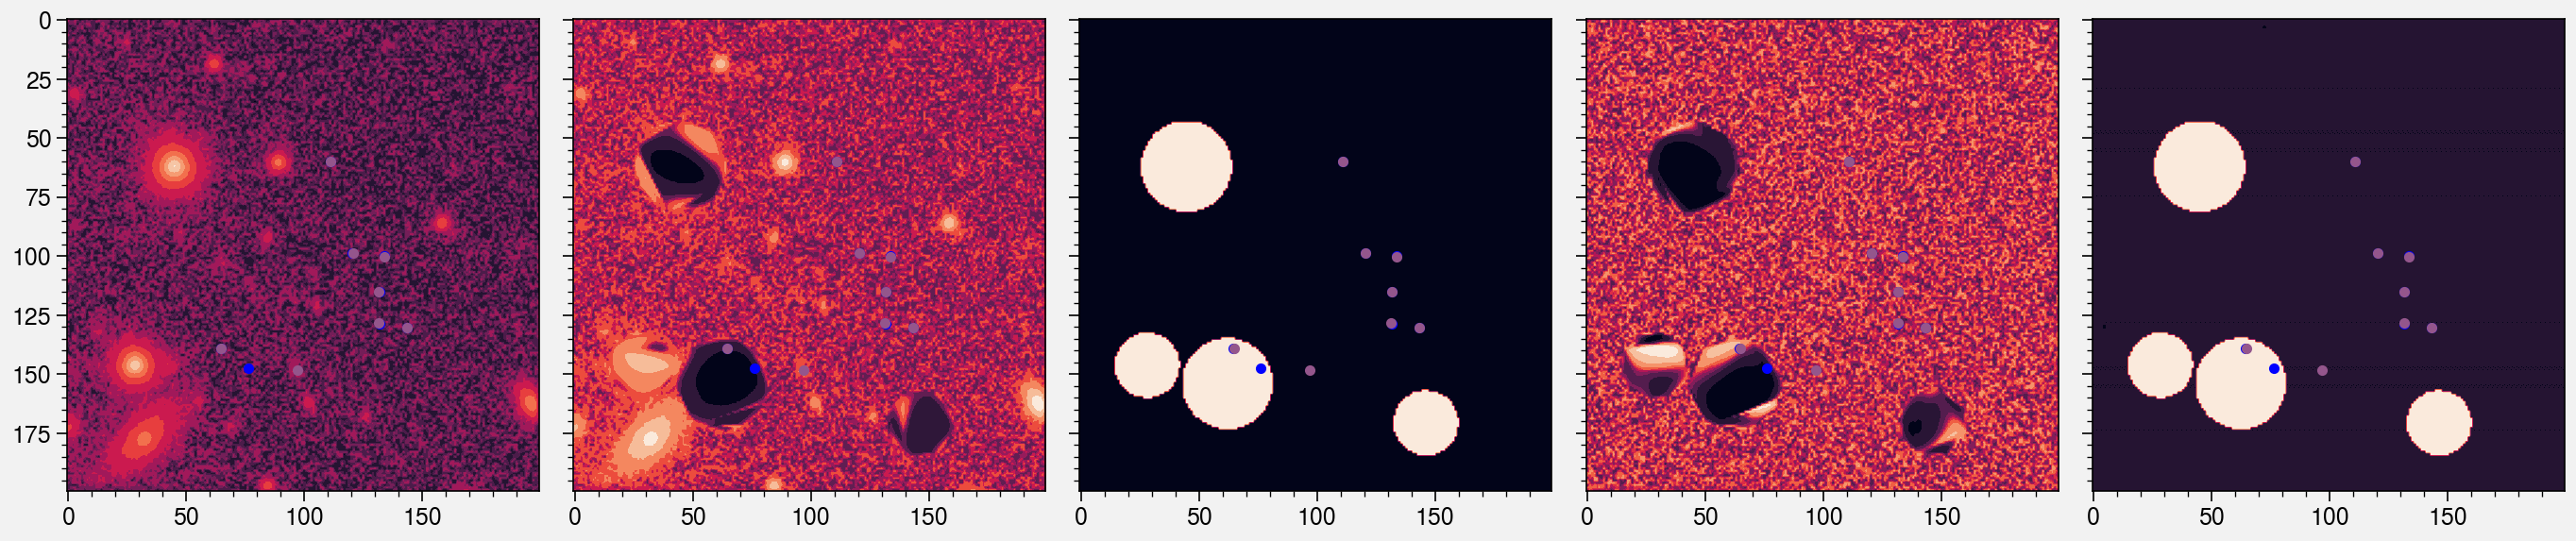

In [67]:
i = 0
msk = data['mcal_step'] == 'noshear'
msk1p = data['mcal_step'] == '2m'

mbobs = mbmeds.get_mbobs(i)
mask_gaia_stars(mbobs, gaia_stars, {"symmetrize": True})

fig, axs = plot.subplots(nrows=1, ncols=5)
im = m.get_cutout(i, 0, type='image')
axs[0].imshow(np.arcsinh(im), cmap='rocket')
axs[1].imshow(np.arcsinh(mbobs[0][0].image), cmap='rocket')
axs[2].imshow((mbobs[0][0].bmask & BMASK_GAIA_STAR) != 0, cmap='rocket')
axs[3].imshow(np.arcsinh(mbobs[0][0].noise), cmap='rocket')
axs[4].imshow(mbobs[0][0].mfrac, cmap='rocket')

for ax in axs:
    ax.plot(data['sx_col_noshear'][msk], data['sx_row_noshear'][msk], 'b.')
    ax.plot(data['sx_col_noshear'][msk1p], data['sx_row_noshear'][msk1p], '.', color='purple')
axs.grid(False)

## Look at a Bigger Run

In [109]:
d = fitsio.read("DES2132-5748_metadetect-v2_mdetcat_range0000-0209.fits")

In [110]:
msk = (
    (d['slice_id'] == 0)
    | (d['slice_id'] == 1)
    | (d['slice_id'] == 2)
    | (d['slice_id'] == 99)
    | (d['slice_id'] == 100)
    | (d['slice_id'] == 101)
    | (d['slice_id'] == 198)
    | (d['slice_id'] == 199)
    | (d['slice_id'] == 200)
)

sids = np.unique(d["slice_id"][msk])

In [111]:
import seaborn as sns
colors = sns.mpl_palette('blues', n_colors=len(sids))

# np.random.shuffle(colors)

(50.0, 350.0)

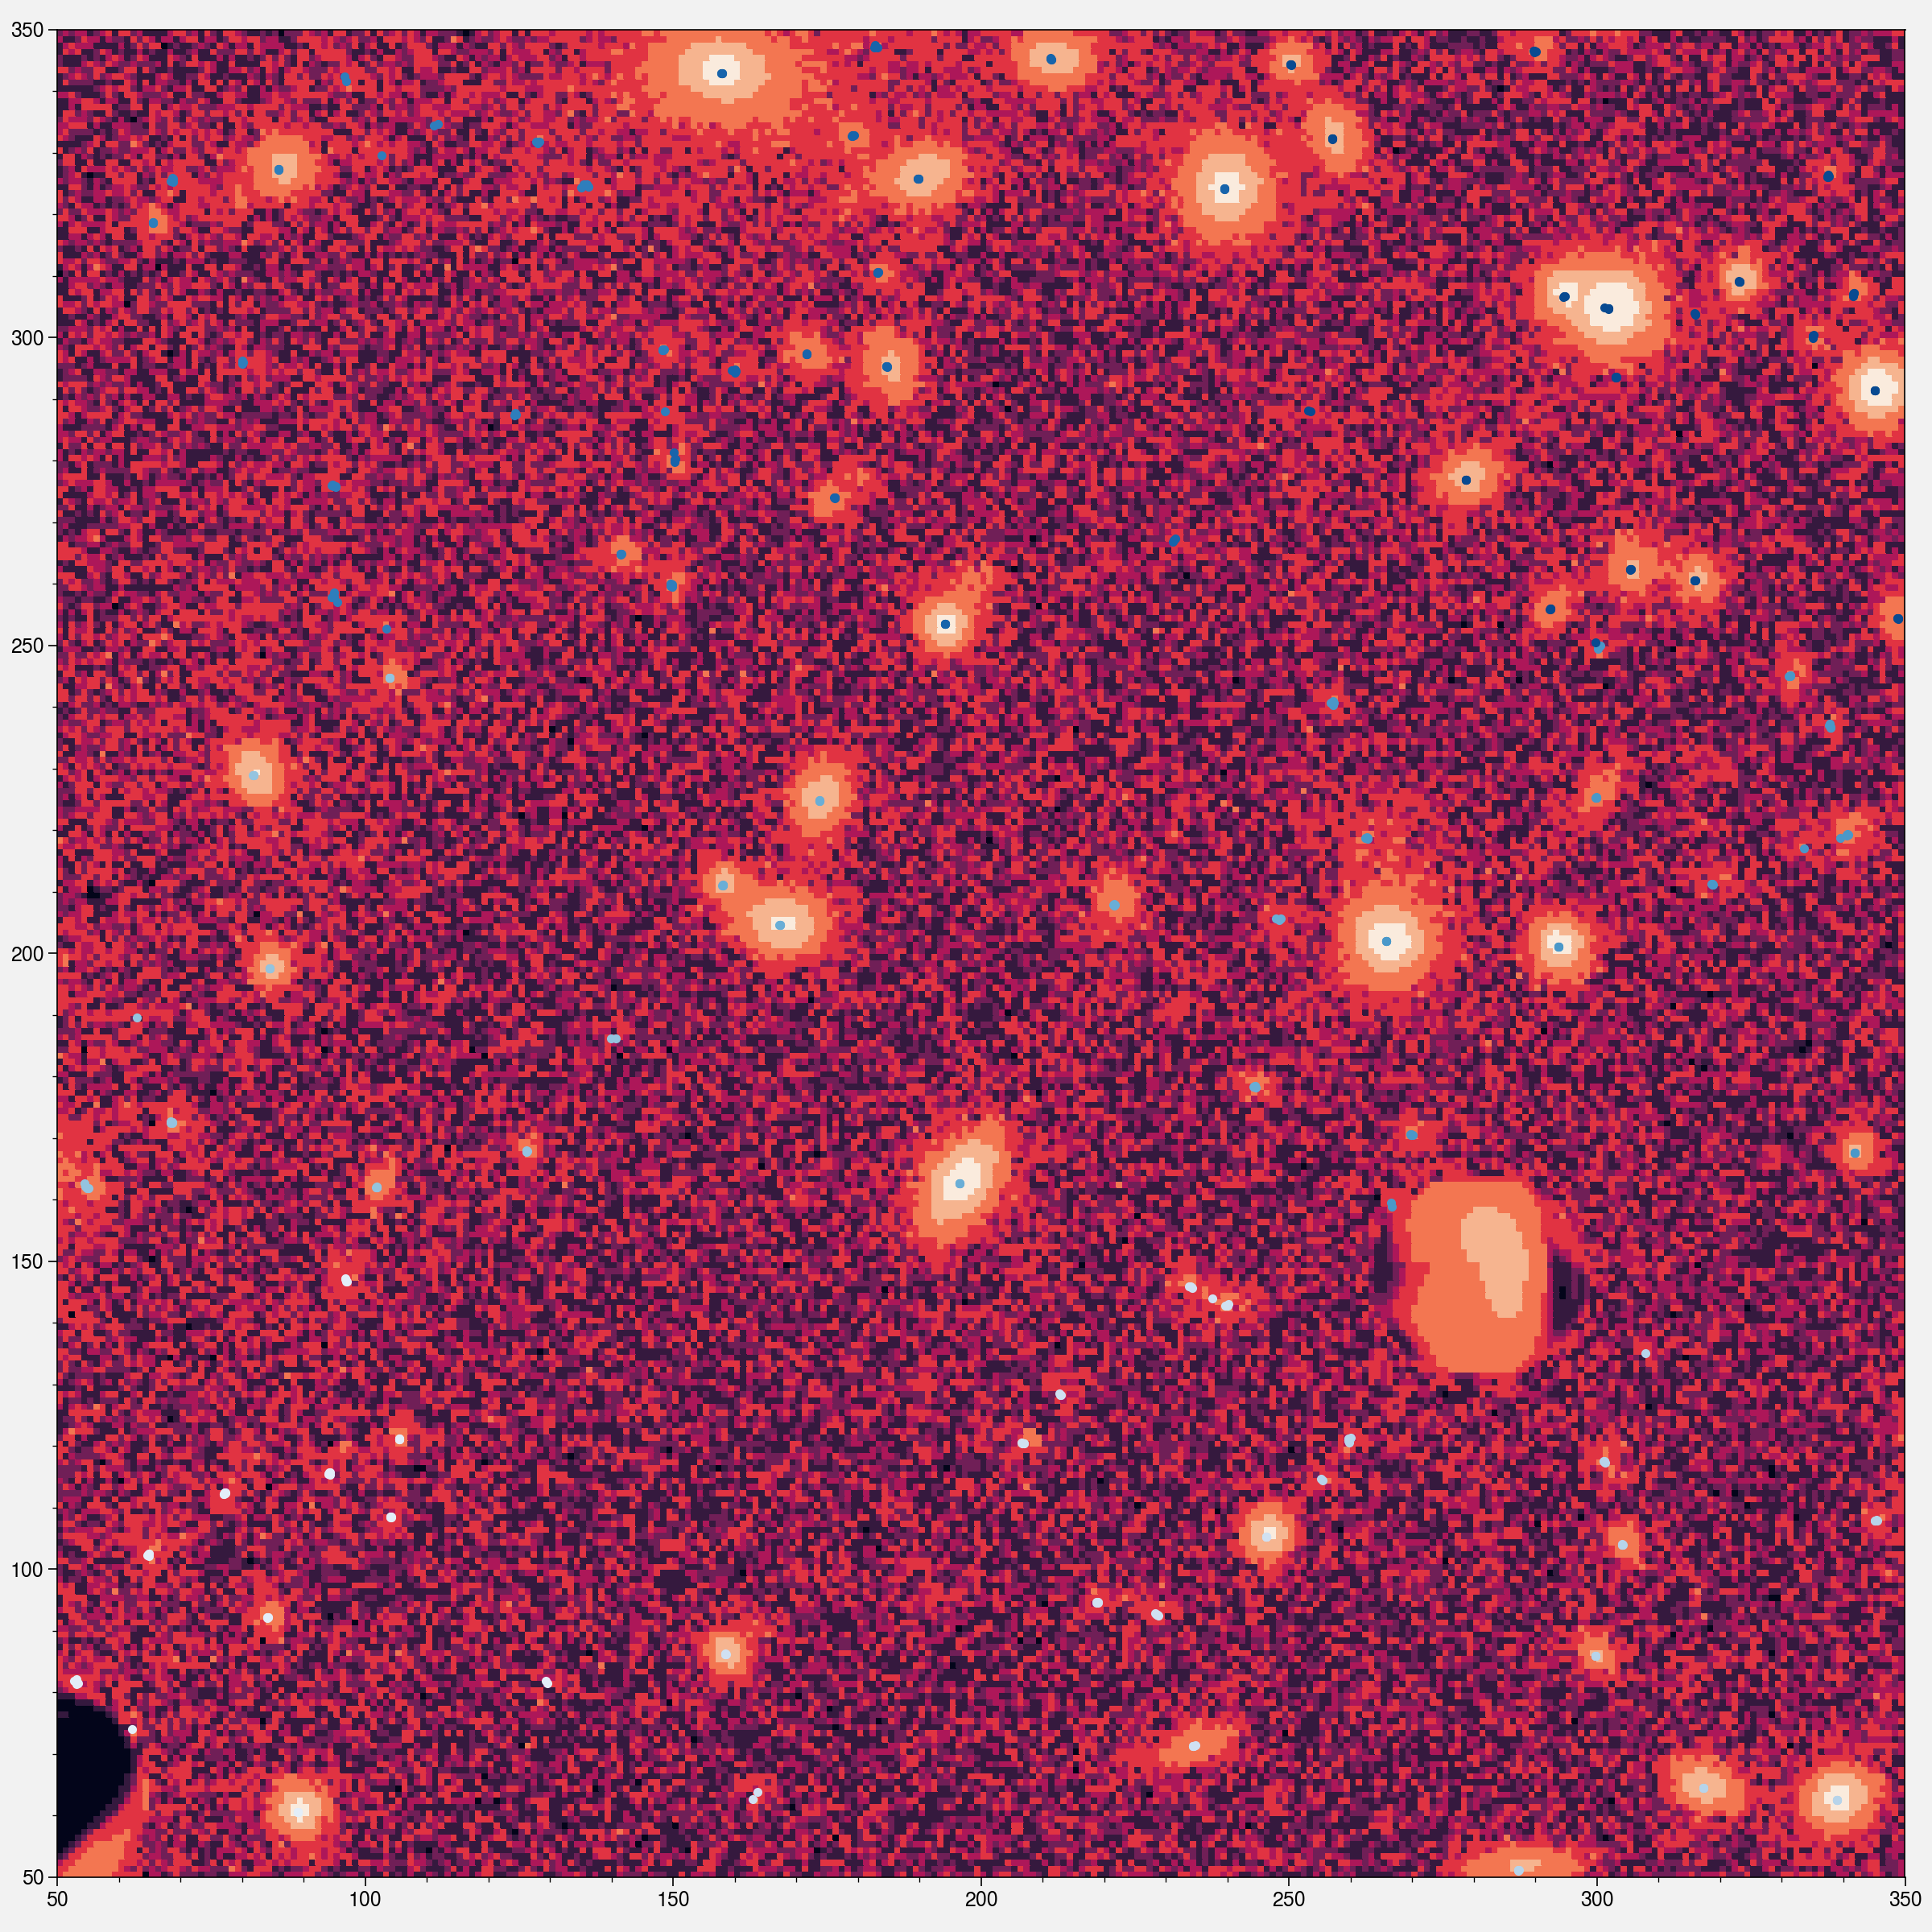

In [115]:
fig, axs = plot.subplots(figsize=(12, 12))

imgs = []
for i, sid in enumerate(sids):
    row_min = m['orig_start_row'][sid][0]+50
    col_min = m['orig_start_col'][sid][0]+50
    x = np.arange(col_min, col_min+101)
    y = np.arange(row_min, row_min+101)
    mbobs = mbmeds.get_mbobs(sid)
    mask_gaia_stars(mbobs, gaia_stars, {"symmetrize": False})
    imgs.append(mbobs[0][0].image[50:-50, 50:-50])

vmin = np.min(np.arcsinh(imgs))
vmax = np.max(np.arcsinh(imgs))

for i, sid in enumerate(sids):
    row_min = m['orig_start_row'][sid][0]+50
    col_min = m['orig_start_col'][sid][0]+50
    x = np.arange(col_min, col_min+101)
    y = np.arange(row_min, row_min+101)
    mbobs = mbmeds.get_mbobs(sid)
    mask_gaia_stars(mbobs, gaia_stars, {"symmetrize": False})
    axs.pcolormesh(x, y, np.arcsinh(mbobs[0][0].image[50:-50, 50:-50]), cmap='rocket', vmin=vmin, vmax=vmax)

    
for i, sid in enumerate(sids):
    msk = d['slice_id'] == sid
    # axs.plot(d["col"][msk], d["row"][msk], 'o', color='blue')
    axs.plot(d["col"][msk], d["row"][msk], '.', color=colors[i])
axs.set_aspect(1)
axs.set_xlim(50, 350)
axs.set_ylim(50, 350)

In [114]:
d.dtype.descr

[('slice_id', '>i8'),
 ('mcal_step', '<U7'),
 ('ra', '>f8'),
 ('dec', '>f8'),
 ('ra_det', '>f8'),
 ('dec_det', '>f8'),
 ('row_det', '>f8'),
 ('col_det', '>f8'),
 ('row', '>f8'),
 ('col', '>f8'),
 ('slice_row', '>f8'),
 ('slice_col', '>f8'),
 ('slice_row_det', '>f8'),
 ('slice_col_det', '>f8'),
 ('flags', '>i4'),
 ('psfrec_flags', '>i4'),
 ('psfrec_g', '>f8', (2,)),
 ('psfrec_T', '>f8'),
 ('psf_g', '>f8', (2,)),
 ('psf_T', '>f8'),
 ('wmom_flags', '>i4'),
 ('wmom_s2n', '>f8'),
 ('wmom_pars', '>f8', (6,)),
 ('wmom_g', '>f8', (2,)),
 ('wmom_g_cov', '>f8', (2, 2)),
 ('wmom_T', '>f8'),
 ('wmom_T_err', '>f8'),
 ('wmom_T_ratio', '>f8'),
 ('ormask', '>i4'),
 ('mfrac', '>f4'),
 ('bmask', '>i4')]